# Programa para Prediccion de Objetos en Imagenes y Cámara

Para esta parte de la tarea se utilizó el modelo YOLOv8, un modelo preentrenado de detección de objetos, el código implementa la capacidad de detectar objetos en tiempo real utilizando la cámara del computador y un modo para analizar imagenes en concreto.


**INSTRUCCIONES DE USO**

Ingrese via teclado 1 si quiere activar el modo de prediccion por Cámara y 0 si quiere el modo de deteccion por Imagen, en el caso de que elija el modo Cámara se abrira una ventana que mostrara la Cámara y prediccion en tiempo real, para terminar el proceso presionar la tecla "Q", en el modo de deteccion de imagen se le solicitara por consola que escriba la direccion de la Imagen, ejemplo "test.jpg".


In [3]:
%pip install ultralytics opencv-python matplotlib

^C
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


SELECCIONE UN MODO DE USO
MODO CAMARA: 1
MODO IMAGEN: 0

Ingresa la direccion de la imagen a analizar: 

image 1/1 c:\Users\juanp\OneDrive\Escritorio\SEMESTE 2025.2\tarea-3-redes-neuronales\test3.jpg: 448x640 1 cat, 1 dog, 1 chair, 287.0ms
Speed: 3.1ms preprocess, 287.0ms inference, 5.5ms postprocess per image at shape (1, 3, 448, 640)


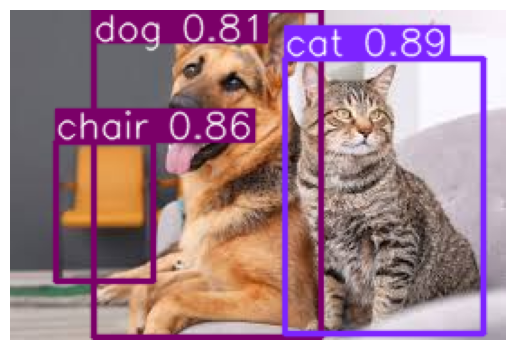

In [8]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

print("SELECCIONE UN MODO DE USO\nMODO CAMARA: 1\nMODO IMAGEN: 0\n")
eleccion = input()
eleccion = int(eleccion)

# Se carga el modelo
model = YOLO("yolov8s.pt")
if (eleccion):

    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        exit()

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # --- Aplicar efecto espejo ---
        frame = cv2.flip(frame, 1)

        # --- Detección con el modelo ---
        results = model(frame, verbose=False)
        annotated_frame = results[0].plot()

        # --- Mostrar en pantalla ---
        cv2.imshow("Cámara", annotated_frame)

        # --- Salir con la tecla 'q' ---
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break


    cap.release()
    cv2.destroyAllWindows()
else:
    print("Ingresa la direccion de la imagen a analizar: ")

    image_path = input()
    results = model(image_path)
    result = results[0]
    annotated_frame = result.plot()
    plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
